In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [17]:
%%time
stem = '12B09'
filenames = ['03','05','06', '07', '10', '12', '14', '16']

for file in filenames:
    if file == '03':
        data = pd.read_csv('../data/z24/permanent/'+stem+file+'.aaa', sep=' ', nrows=65536, skiprows=1)
        data.columns = [file]
        continue
    temp = pd.read_csv('../data/z24/permanent/'+stem+file+'.aaa', sep=' ', nrows=65536, skiprows=1)
    temp.columns = [file]
    data = pd.concat([data, temp], axis=1)

data = data.iloc[1:,:]
normalized_data=(data-data.mean())/data.std()

CPU times: user 158 ms, sys: 7 ms, total: 165 ms
Wall time: 204 ms


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7e01ce7e64e0>,
      dtype=object)

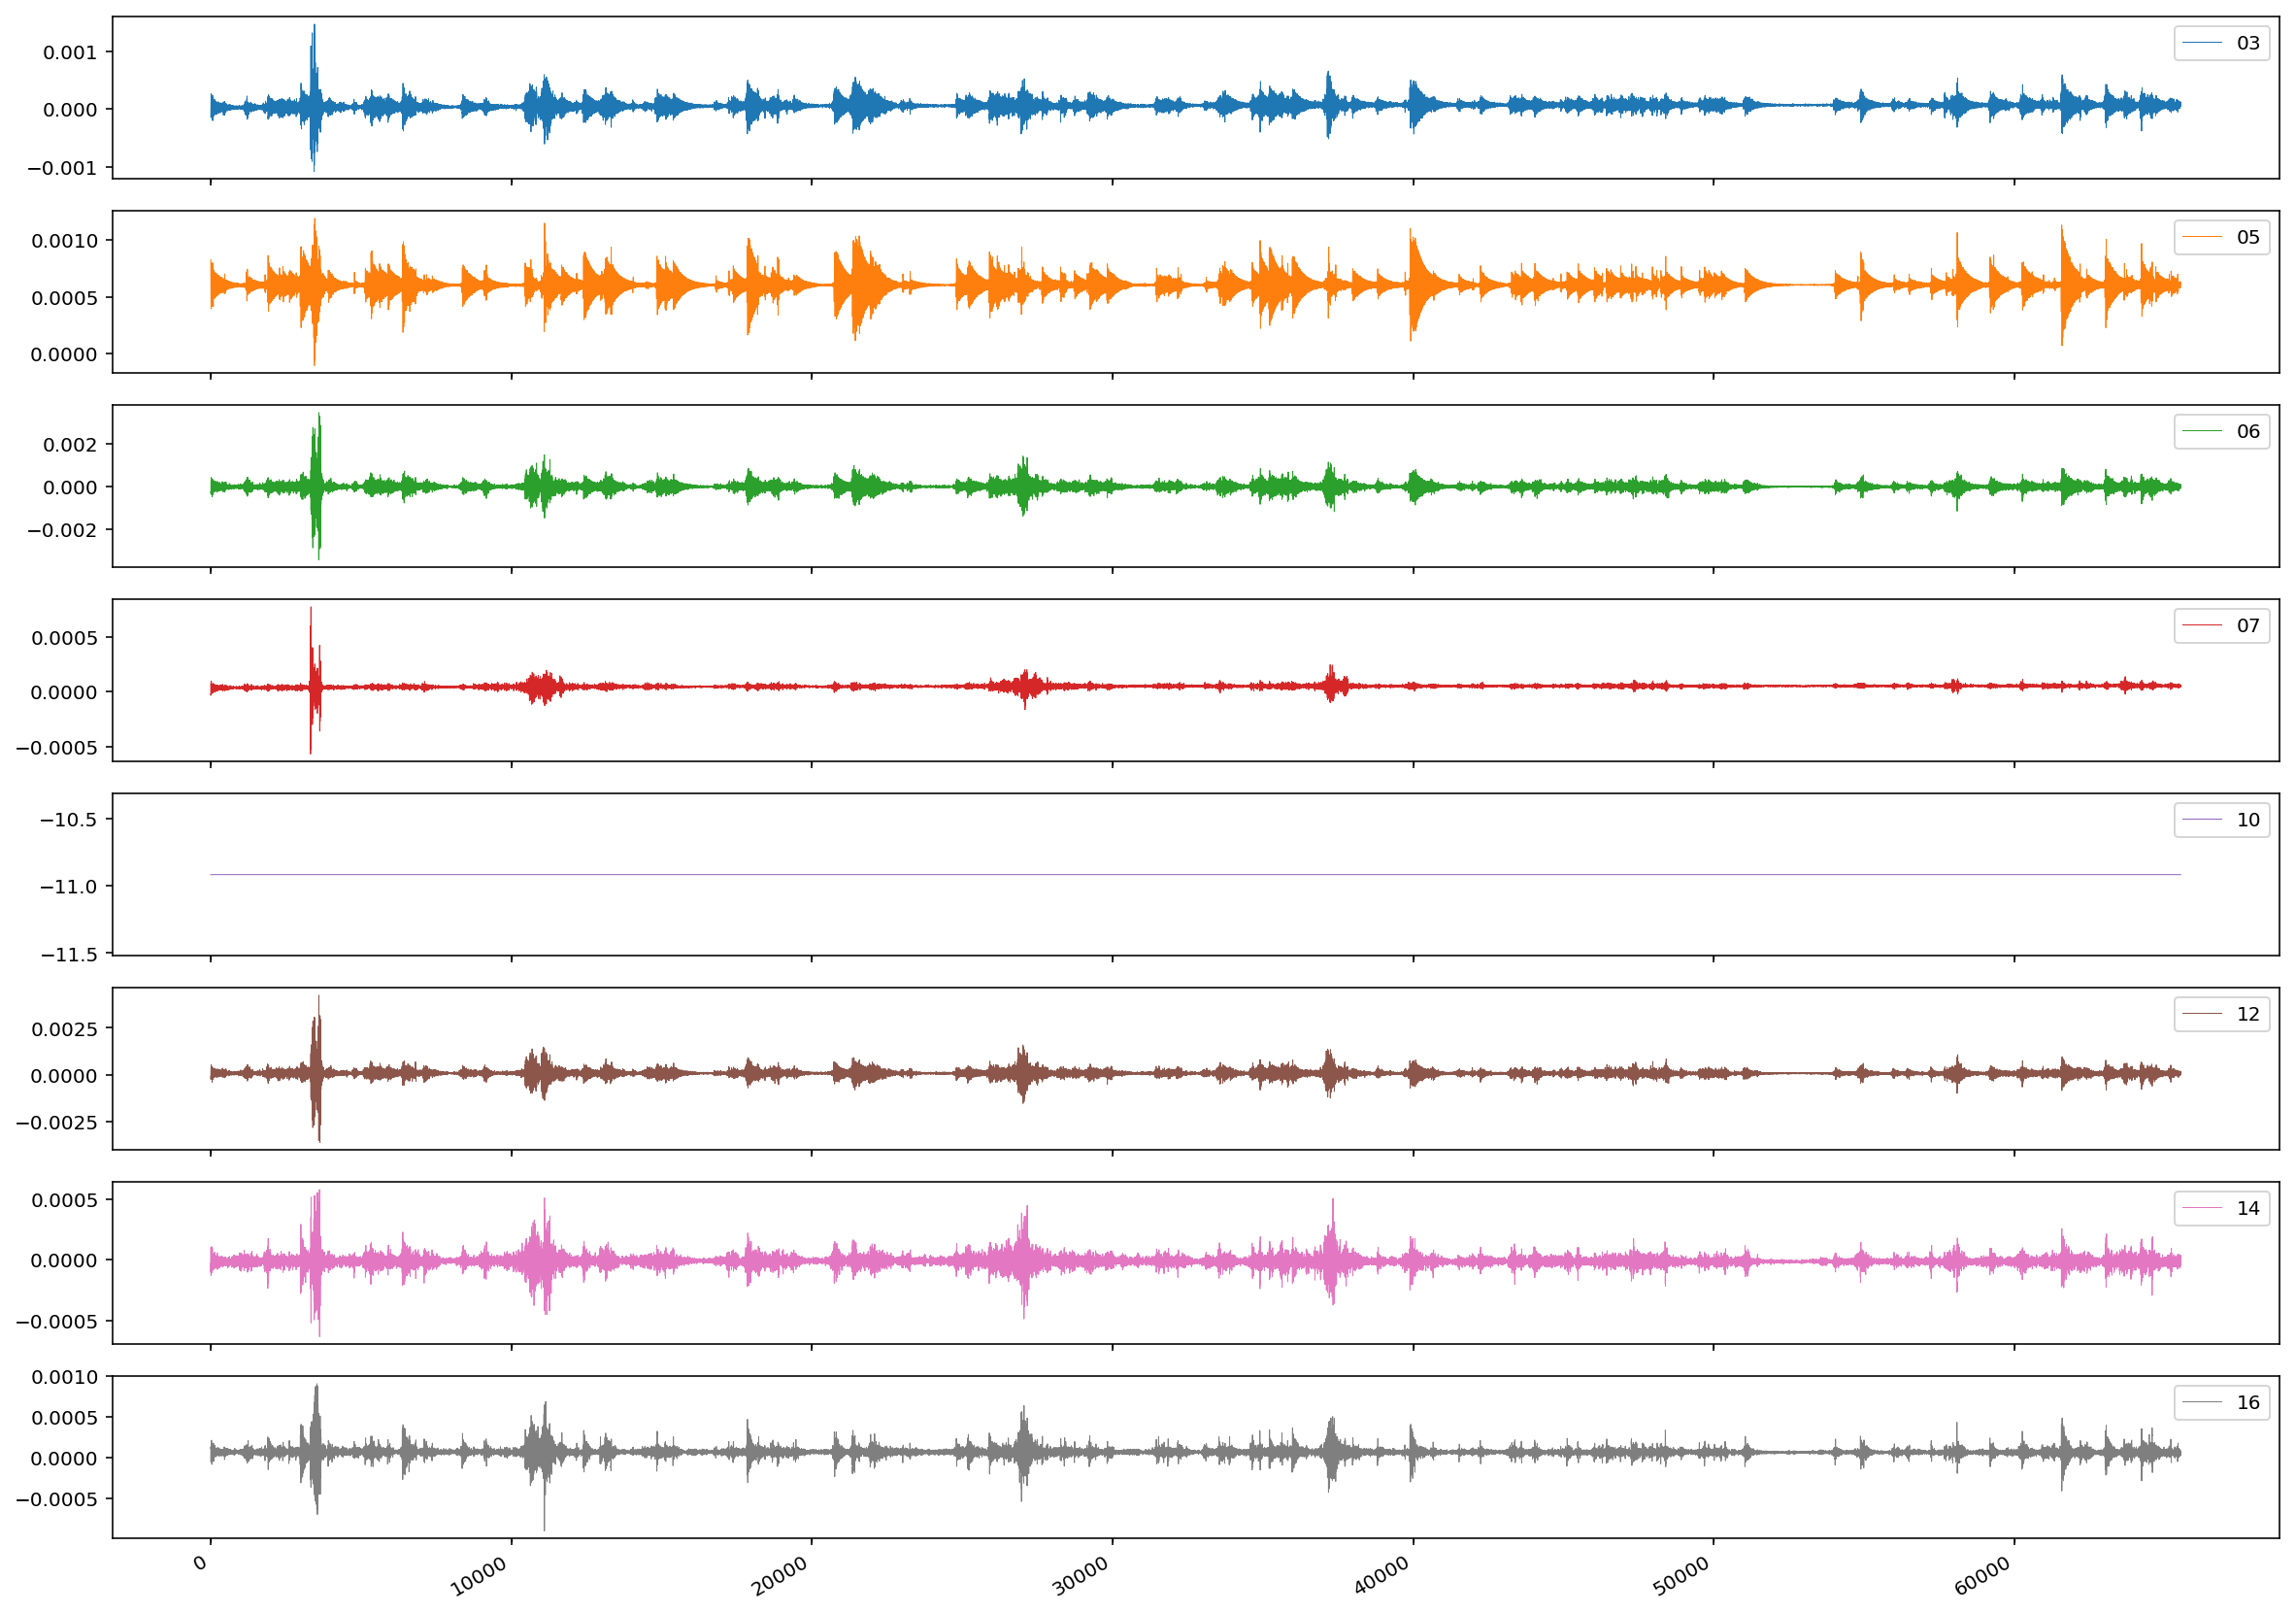

In [23]:
data.iloc[:,:].plot(subplots=True, alpha=1,figsize=(20,2*8), linewidth=0.5)

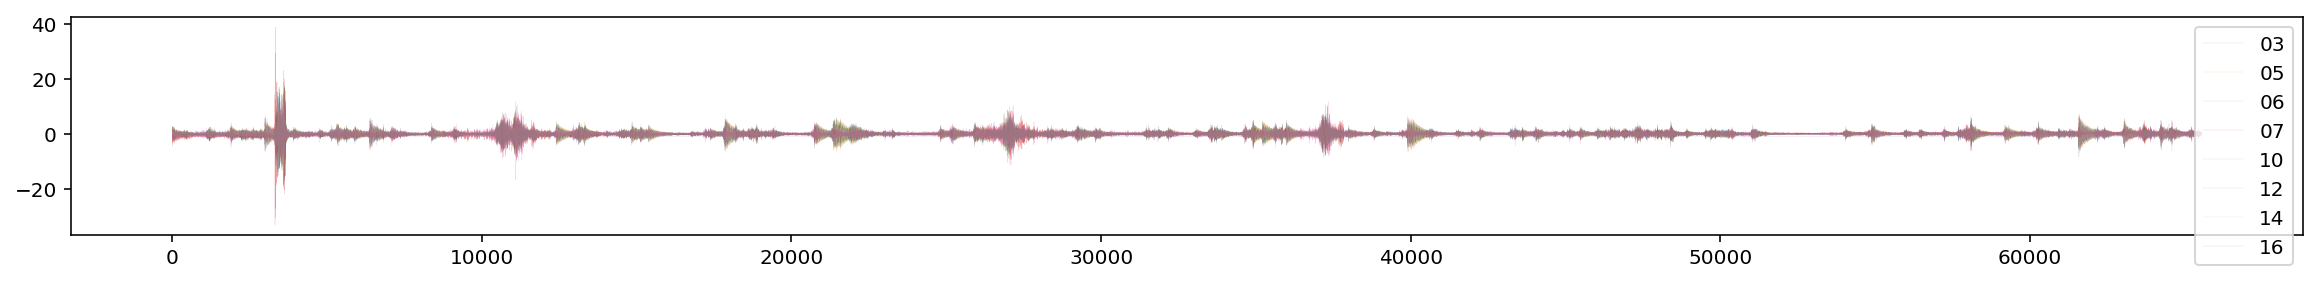

In [25]:
normalized_data.plot(alpha=0.5,figsize=(20,2), linewidth=0.1) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7e01cd8377b8>,
      dtype=object)

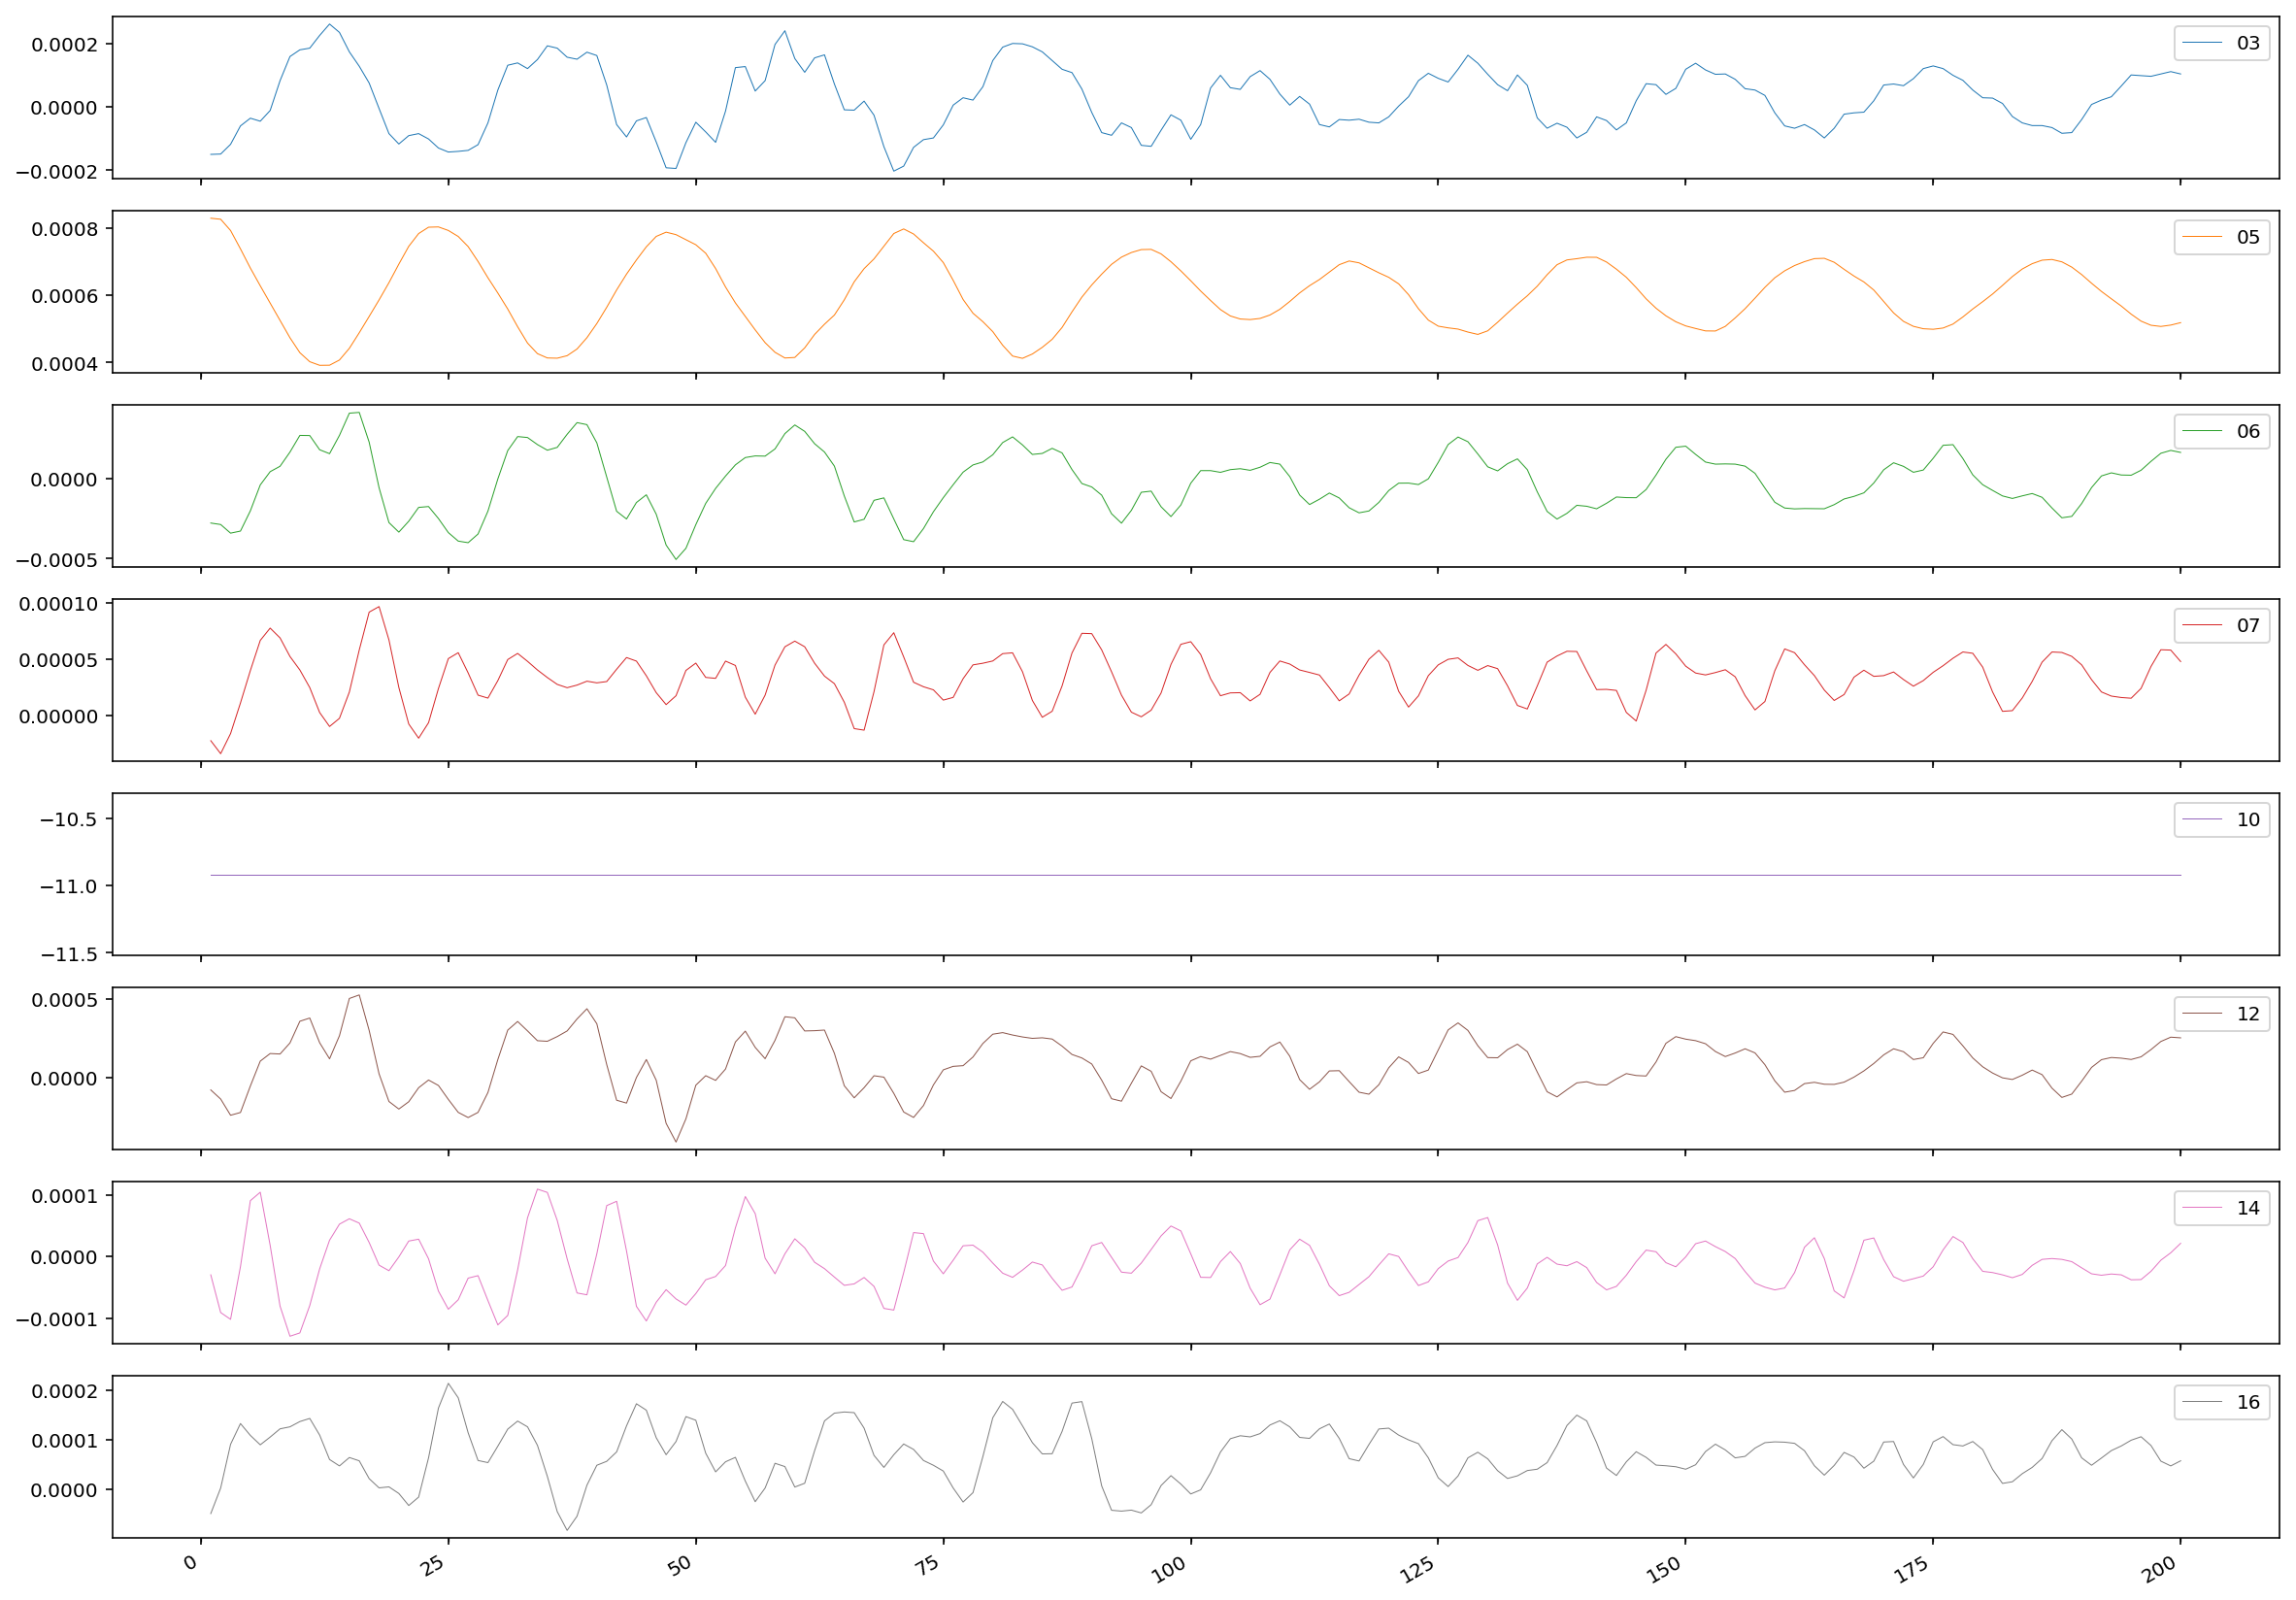

In [29]:
data.iloc[:200,:].plot(subplots=True, alpha=1,figsize=(20,2*8), linewidth=0.5)

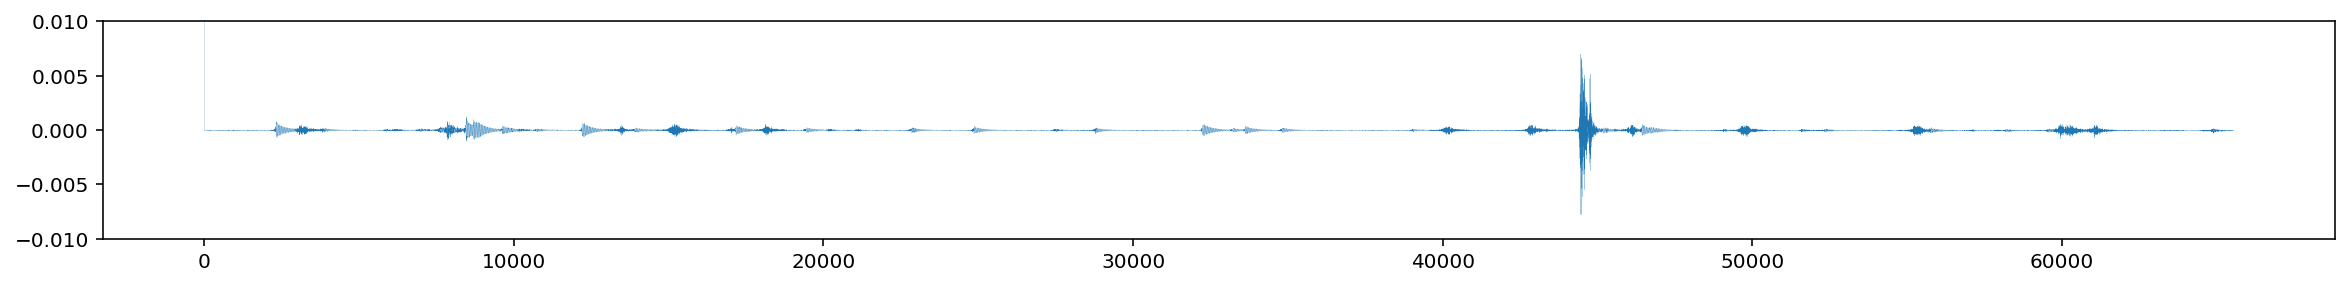

In [21]:
permanent_monitor = pd.read_csv('../data/z24/permanent/12A0603.aaa',sep=' ', nrows=65536, skiprows=1)
plt.figure(figsize=(20,2))
plt.ylim([-0.01, 0.01])
plt.plot(permanent_monitor, linewidth=0.1)

# Progressive damage testing

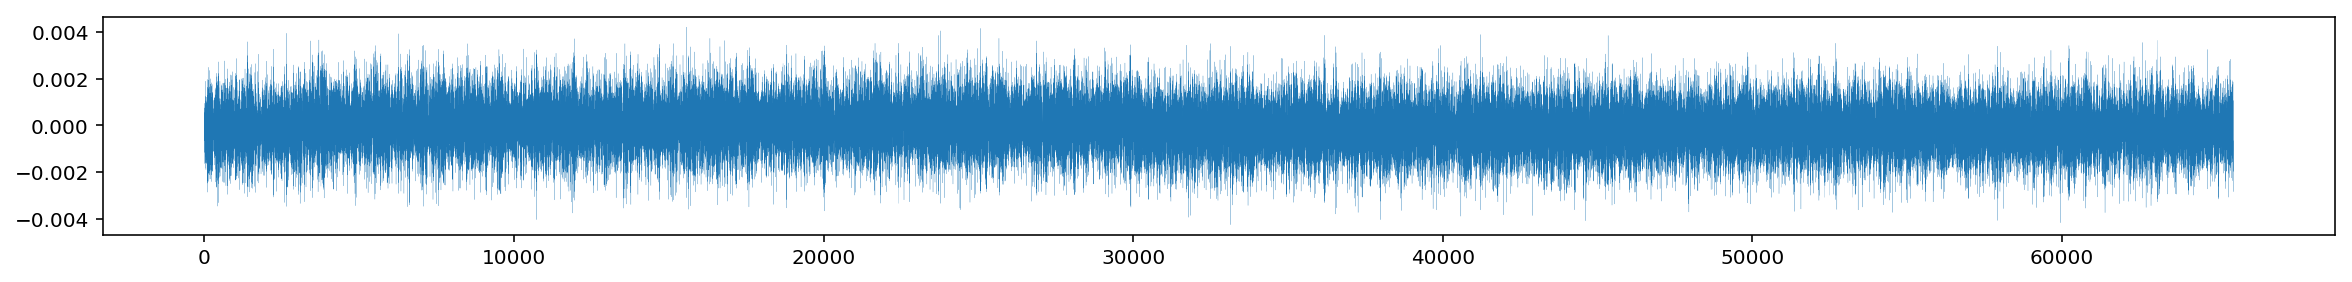

In [7]:
import scipy.io
damage = scipy.io.loadmat(file_name='../data/z24/damage/02/fvt/02setup03.mat')
plt.figure(figsize=(20,2))
plt.plot(damage['data'][:,10], linewidth=0.1)

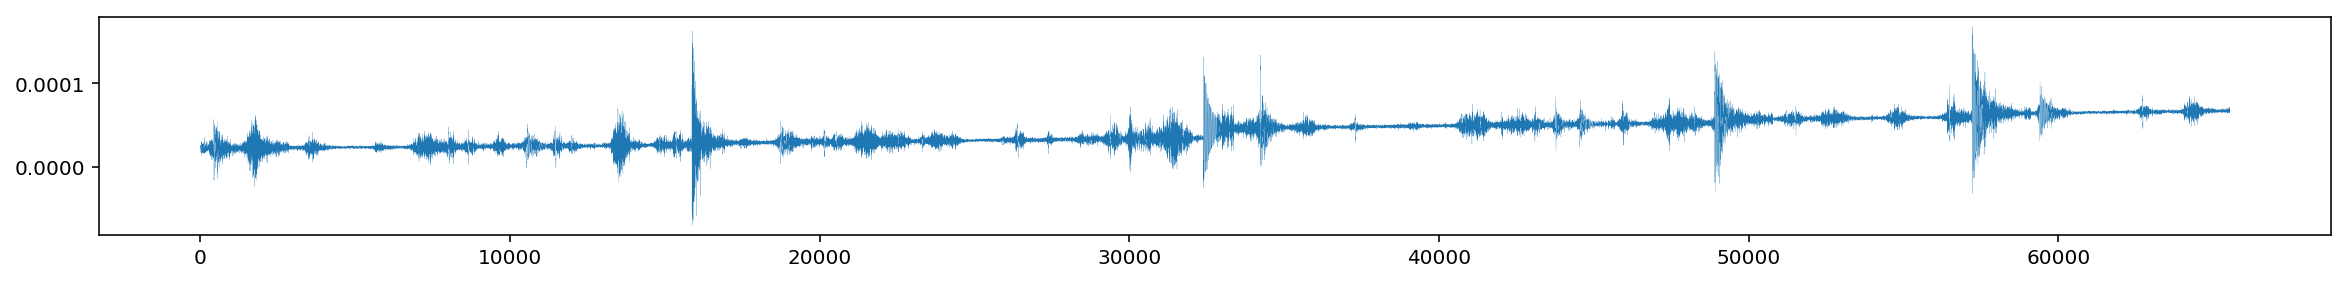

In [8]:
damage = scipy.io.loadmat(file_name='../data/z24/damage/02/avt/02setup03.mat')
plt.figure(figsize=(20,2))
plt.plot(damage['data'][:,10], linewidth=0.1)

In [31]:
data

,03,05,06,07,10,12,14,16
1,-0.000150,0.000830,-0.000279,-0.000023,-10.91767,-8.033333e-05,-2.966667e-05,-0.000049
2,-0.000149,0.000827,-0.000288,-0.000034,-10.91767,-1.386667e-04,-9.066667e-05,0.000003
3,-0.000118,0.000793,-0.000342,-0.000016,-10.91767,-2.423333e-04,-1.016667e-04,0.000091
4,-0.000060,0.000738,-0.000329,0.000011,-10.91767,-2.246667e-04,-1.633333e-05,0.000133
5,-0.000036,0.000681,-0.000203,0.000040,-10.91767,-5.533333e-05,9.033333e-05,0.000109
6,-0.000045,0.000628,-0.000042,0.000067,-10.91767,1.036667e-04,1.040000e-04,0.000090
7,-0.000012,0.000577,0.000041,0.000078,-10.91767,1.523333e-04,1.800000e-05,0.000106
8,0.000082,0.000525,0.000074,0.000069,-10.91767,1.493333e-04,-8.033333e-05,0.000123
9,0.000158,0.000474,0.000163,0.000052,-10.91767,2.200000e-04,-1.290000e-04,0.000127
10,0.000179,0.000429,0.000266,0.000040,-10.91767,3.586667e-04,-1.236667e-04,0.000137


In [33]:
data.to_csv('z24_vibrations.csv',index=False)